# 1 Wrangling - San Francisco Police Incidents

## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Wrangling - San Francisco Police Incidents](#1_Wrangling_-_San_Francisco_Police_Incidents)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load The Data](#1.4_Load_The_Data)
  * [1.5 Explore The Data](#1.5_Explore_The_Data)
    * [1.5.1 Shape and Column Analysis](#1.5.1_Shape_and_Column_Analysis)
    * [1.5.2 Dropping unneeded columns](#1.5.2_Dropping_unneeded_columns)
      * [1.5.2.1 Intersection](#1.5.2.1_Intersection)
    * [1.5.3 Reviewing NULL values](#1.5.3_Reviewing_NULL_values)
      * [1.5.3.1 Filed Online](#1.5.3.1_Filed_Online)
      * [1.5.3.2 Analysis Neighborhood](#1.5.3.2_Analysis_Neighborhood)
        * [1.5.3.2.1 Missing Neighborhood - Vehicle Supplement](#1.5.3.2.1_Missing_Neighborhood_-_Vehicle_Supplement)
        * [1.5.3.2.2 Missing Neighborhood - Coplogic](#1.5.3.2.2_Missing_Neighborhood_-_Coplogic)
    * [1.5.4 Categorical Features](#1.5.4_Categorical_Features)
      * [1.5.4.1 Police District](#1.5.4.1_Police_District)
        * [1.5.4.1.1 Police District - Out of SF](#1.5.4.1.1_Police_District_-_Out_of_SF)
      * [1.5.4.2 Analysis Neighborhood](#1.5.4.2_Analysis_Neighborhood)
      * [1.5.4.3 Supervisor District](#1.5.4.3_Supervisor_District)
      * [1.5.4.4 Incident Category](#1.5.4.4_Incident_Category)
      * [1.5.4.5 Incident Subcategory](#1.5.4.5_Incident_Subcategory)
  * [1.6 Aggregate data](#1.6_Aggregate_data)
  * [1.7 Save data](#1.7_Save_data)

## 1.2 Introduction<a id='1.2_Introduction'></a>

Data was exported from <a href="https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783">San Francisco's Open Data portal regarding Police Department Incident Reports: 2018 to Present</a> into CSV files on October 20, 2020. This dataset includes incident reports that have been filed as of January 1, 2018. These reports are filed by officers or self-reported by members of the public using SFPD’s online reporting system.

We plan to explore this data in conjunction with San Francisco's 311 data as well as Redfin's San Francisco neighborhood house sales data, and we will do this by comparing across San Francisco neighborhoods.

In this notebook, we will:
 * load the raw data
 * explore NULL values and decide how to handle them
 * drop unnecessary columns
 
At the end of this notebook, we will generate the following files:
 * SF_Police_Incidents_aggregated.csv : data aggregated by month, from January 2018 up to and including September 2020; we use this date range to stay in sync with the other data
 * SF_Police_Incident_Neighborhoods.csv : a list of all the Neighborhoods in the data (note that this list can also be obtained from SF Analysis Neighborhoods https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h but with additional geo-spatial data)

## 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Load The Data<a id='1.4_Load_The_Data'></a>

Note that the single CSV file was too large for GitHub, therefore, it had to be split into 6 smaller files, one for each half year, starting in 2018

In [2]:
filename_prefix = 'raw_data/Police_Department_Incident_Reports__'
filename_suffix = '.csv'
list_of_periods = ['2018_1', '2018_2', '2019_1', '2019_2', '2020_1', '2020_2']

incident_data = pd.DataFrame()

for period in list_of_periods:
    filename = filename_prefix + period + filename_suffix
    period_data = pd.read_csv(filename, low_memory=False)
#    print(filename)
#    print(period_data.shape)
#    print(period_data.info())
    incident_data = incident_data.append(period_data)

In [3]:
incident_data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2020/09/29 12:29:00 PM,96531109029,965311,200586298,202731493.0,...,False Personation to Receive Money or Property,Open or Active,FRANKLIN ST \ BUSH ST,26498000.0,Northern,Western Addition,2.0,37.788280,-122.423594,"(37.78827973195545, -122.42359407328958)"
1,2018/01/01 12:01:00 AM,2018/01/01,00:01,2018,Monday,2020/09/20 06:50:00 AM,96296268020,962962,200566397,202640619.0,...,Miscellaneous Investigation,Open or Active,HOWARD ST \ 06TH ST,23946000.0,Southern,South of Market,6.0,37.779739,-122.407159,"(37.77973890462704, -122.40715948914875)"
2,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2020/09/08 01:08:00 PM,95970009027,959700,200540874,202521623.0,...,False Personation,Open or Active,SAN BRUNO AVE \ OLMSTEAD ST,20576000.0,Bayview,Portola,9.0,37.722832,-122.401613,"(37.722832384254595, -122.40161258024654)"
3,2018/01/01 12:42:00 PM,2018/01/01,12:42,2018,Monday,2018/01/01 12:42:00 PM,61897707041,618977,171035750,NaN,...,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
4,2018/01/01 04:49:00 PM,2018/01/01,16:49,2018,Monday,2018/01/01 04:49:00 PM,61901507045,619015,171055203,NaN,...,"Vehicle, Recovered, Truck",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN


## 1.5 Explore The Data<a id='1.5_Explore_The_Data'></a>

### 1.5.1 Shape and Column Analysis<a id='1.5.1_Shape_and_Column_Analysis'></a>

In [4]:
incident_data.shape

(395149, 26)

In [5]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        395149 non-null  object 
 1   Incident Date            395149 non-null  object 
 2   Incident Time            395149 non-null  object 
 3   Incident Year            395149 non-null  int64  
 4   Incident Day of Week     395149 non-null  object 
 5   Report Datetime          395149 non-null  object 
 6   Row ID                   395149 non-null  int64  
 7   Incident ID              395149 non-null  int64  
 8   Incident Number          395149 non-null  int64  
 9   CAD Number               306560 non-null  float64
 10  Report Type Code         395149 non-null  object 
 11  Report Type Description  395149 non-null  object 
 12  Filed Online             81760 non-null   object 
 13  Incident Code            395149 non-null  int64  
 14  Incid

There are 26 columns and 395149 rows. All rows have a non-null `Incident Description`. However, since we are interested specifically in the breakdown of these incidents by neighborhood, we note that there exist null values in `Analysis Neighborhood`. 

In [6]:
incident_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Incident Datetime,2018/01/01 12:00:00 AM,2018/01/01 12:01:00 AM,2018/01/01 12:00:00 AM,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/01 04:07:00 AM,2018/01/01 04:00:00 PM,2018/01/01 12:10:00 AM,2018/01/01 12:55:00 AM,2018/01/01 12:55:00 AM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,00:00,00:01,00:00,12:42,16:49,04:07,16:00,00:10,00:55,00:55
Incident Year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday
Report Datetime,2020/09/29 12:29:00 PM,2020/09/20 06:50:00 AM,2020/09/08 01:08:00 PM,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/02 09:25:00 AM,2018/01/09 10:27:00 AM,2018/01/01 12:40:00 AM,2018/01/01 01:41:00 AM,2018/01/01 01:41:00 AM
Row ID,96531109029,96296268020,95970009027,61897707041,61901507045,62075106372,62267806372,61868707041,61869104134,61869115300
Incident ID,965311,962962,959700,618977,619015,620751,622678,618687,618691,618691
Incident Number,200586298,200566397,200540874,171035750,171055203,186002716,186008316,171051427,180000172,180000172
CAD Number,2.02731e+08,2.02641e+08,2.02522e+08,NaN,NaN,NaN,NaN,NaN,1.8001e+08,1.8001e+08


### 1.5.2 Dropping unneeded columns<a id='1.5.2_Dropping_unneeded_columns'></a>

We will drop the following columns to clean up the data:
 * `CAD Number`:  The number generated by the Computer Aided Dispatch (CAD) system used by the Department of Emergency Management (DEM) to dispatch officers and other public safety personnel.
 * `CNN` : Centerline Node Network identifier used to refer to the Intersection
 * `Latitude`, `Longitude`, and `point`

In [7]:
incident_data.drop(columns=['CAD Number', 'CNN', 'Latitude', 'Longitude', 'point'], inplace=True)

We will keep `Supervisor District`, and `Police District` for now to check on their relevance to the data.

#### 1.5.2.1 Intersection<a id='1.5.2.1_Intersection'></a>

We note that `Intersection` also contains NULL values. Let's see if `Intersection` can be used to derive any missing `Analysis Neighborhood` data.

In [8]:
# find data where Analysis Neighborhood is NULL and Intersection is non-Null
incident_data[incident_data['Analysis Neighborhood'].isna()]['Intersection'].value_counts()

GENEVA AVE \ SANTOS ST    79
ACTON ST \ BRUMISS TER     2
Name: Intersection, dtype: int64

Interesting, only 81 records contain non-NULL intersections and NULL Neighborhoods. Let's look at the data to see if there are any non-NULL Neighborhoods tied to these Intersections.

In [9]:
# let's see if these Intersections are tied to non-Null neighborhoods
incident_data[~incident_data['Analysis Neighborhood'].isna() & incident_data['Intersection'].isin(['GENEVA AVE \ SANTOS ST','ACTON ST \ BRUMISS TER'])]

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,Report Type Code,...,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District


In [10]:
incident_data[incident_data['Analysis Neighborhood'].isna() & ~incident_data['Intersection'].isna()].groupby('Police District')['Row ID'].count()

Police District
Ingleside    81
Name: Row ID, dtype: int64

Looking at the map provided by San Francisco's official data portal on <a href="https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h">Neighborhood boundaries</a>, we determine that both of the above Intersections are at the border of San Francisco and adjacent Daly City. Therefore, it would not make sense to impute a Neighborhood value on the data.

We can go ahead and drop the `Intersection` column as it provides no additional value to our dataset.

In [11]:
incident_data.drop(columns=['Intersection'], inplace=True)

In [12]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        395149 non-null  object 
 1   Incident Date            395149 non-null  object 
 2   Incident Time            395149 non-null  object 
 3   Incident Year            395149 non-null  int64  
 4   Incident Day of Week     395149 non-null  object 
 5   Report Datetime          395149 non-null  object 
 6   Row ID                   395149 non-null  int64  
 7   Incident ID              395149 non-null  int64  
 8   Incident Number          395149 non-null  int64  
 9   Report Type Code         395149 non-null  object 
 10  Report Type Description  395149 non-null  object 
 11  Filed Online             81760 non-null   object 
 12  Incident Code            395149 non-null  int64  
 13  Incident Category        394879 non-null  object 
 14  Incid

### 1.5.3 Reviewing NULL values<a id='1.5.1_Shape_and_Column_Analysis'></a>

#### 1.5.3.1 Filed Online<a id='1.5.3.1_Filed_Online'></a>

Notice that `Filed Online` has a large number of null values. The documentation states that: "Non- emergency police reports can be filed online by members of the public using SFPD’s self-service reporting system called Coplogic Values in this field will be “TRUE” if Coplogic was used to file the report."

In [13]:
incident_data['Filed Online'].value_counts()

True    81760
Name: Filed Online, dtype: int64

We should be able to verify this against `Report Type Description`, for which the documentation describes as: "The description of the report type, can be one of: Initial; Initial Supplement; Vehicle Initial; Vehicle Supplement; Coplogic Initial; Coplogic Supplement"

In [14]:
incident_data['Report Type Description'].value_counts()

Initial                246030
Coplogic Initial        72549
Initial Supplement      32376
Vehicle Initial         20745
Vehicle Supplement      14238
Coplogic Supplement      9211
Name: Report Type Description, dtype: int64

In [15]:
incident_data['Report Type Description'].isin(['Coplogic Initial','Coplogic Supplement']).sum()

81760

Looks good! This means we can fill in the null values with the value of False.

In [16]:
incident_data['Filed Online'].fillna(False, inplace=True)
incident_data['Filed Online'].value_counts()

False    313389
True      81760
Name: Filed Online, dtype: int64

#### 1.5.3.2 Analysis Neighborhood<a id='1.5.3.2_Analysis_Neighborhood'></a>

We have approximately 20,000 NULL values for this field. Let's look at examples and the breakdown.

In [17]:
incident_data['Analysis Neighborhood'].isna().sum()

20461

In [18]:
incident_data[incident_data['Analysis Neighborhood'].isna()].head().T

,3,4,5,6,7
Incident Datetime,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/01 04:07:00 AM,2018/01/01 04:00:00 PM,2018/01/01 12:10:00 AM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,12:42,16:49,04:07,16:00,00:10
Incident Year,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday
Report Datetime,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/02 09:25:00 AM,2018/01/09 10:27:00 AM,2018/01/01 12:40:00 AM
Row ID,61897707041,61901507045,62075106372,62267806372,61868707041
Incident ID,618977,619015,620751,622678,618687
Incident Number,171035750,171055203,186002716,186008316,171051427
Report Type Code,VS,VS,II,II,VS


In [19]:
incident_data[incident_data['Analysis Neighborhood'].isna()].groupby(['Incident Year','Report Type Description'])['Incident ID'].count()

Incident Year  Report Type Description
2018           Coplogic Initial           5606
               Coplogic Supplement         661
               Initial                     172
               Initial Supplement          229
               Vehicle Initial              66
               Vehicle Supplement         1209
2019           Coplogic Initial           5559
               Coplogic Supplement         771
               Initial                     293
               Initial Supplement          362
               Vehicle Initial             113
               Vehicle Supplement         1266
2020           Coplogic Initial           2302
               Coplogic Supplement         257
               Initial                      78
               Initial Supplement          148
               Vehicle Initial              71
               Vehicle Supplement         1298
Name: Incident ID, dtype: int64

Let's create a data frame with the counts of the null neighborhood against the total records, by Incident month year and Report Type Description.

In [20]:
df_nullnbrhds = incident_data['Analysis Neighborhood'].isna().groupby([incident_data['Incident Date'].str.slice(stop=7),
                                                       incident_data['Report Type Description']]).sum().astype(int).rename('null_nbrhd_count').to_frame().T.append(
incident_data['Analysis Neighborhood'].notna().groupby([incident_data['Incident Date'].str.slice(stop=7),
                                                       incident_data['Report Type Description']]).sum().astype(int).rename('has_nbrhd_count').to_frame().T
).T.reset_index()

In [21]:
df_nullnbrhds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Incident Date            204 non-null    object
 1   Report Type Description  204 non-null    object
 2   null_nbrhd_count         204 non-null    int32 
 3   has_nbrhd_count          204 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 4.9+ KB


In [22]:
df_nullnbrhds['total'] = df_nullnbrhds['null_nbrhd_count'] + df_nullnbrhds['has_nbrhd_count']
df_nullnbrhds['Pct_missing'] = df_nullnbrhds['null_nbrhd_count'] * 100 / df_nullnbrhds['total']

# Verify we have included all records
df_nullnbrhds['total'].sum()

395149

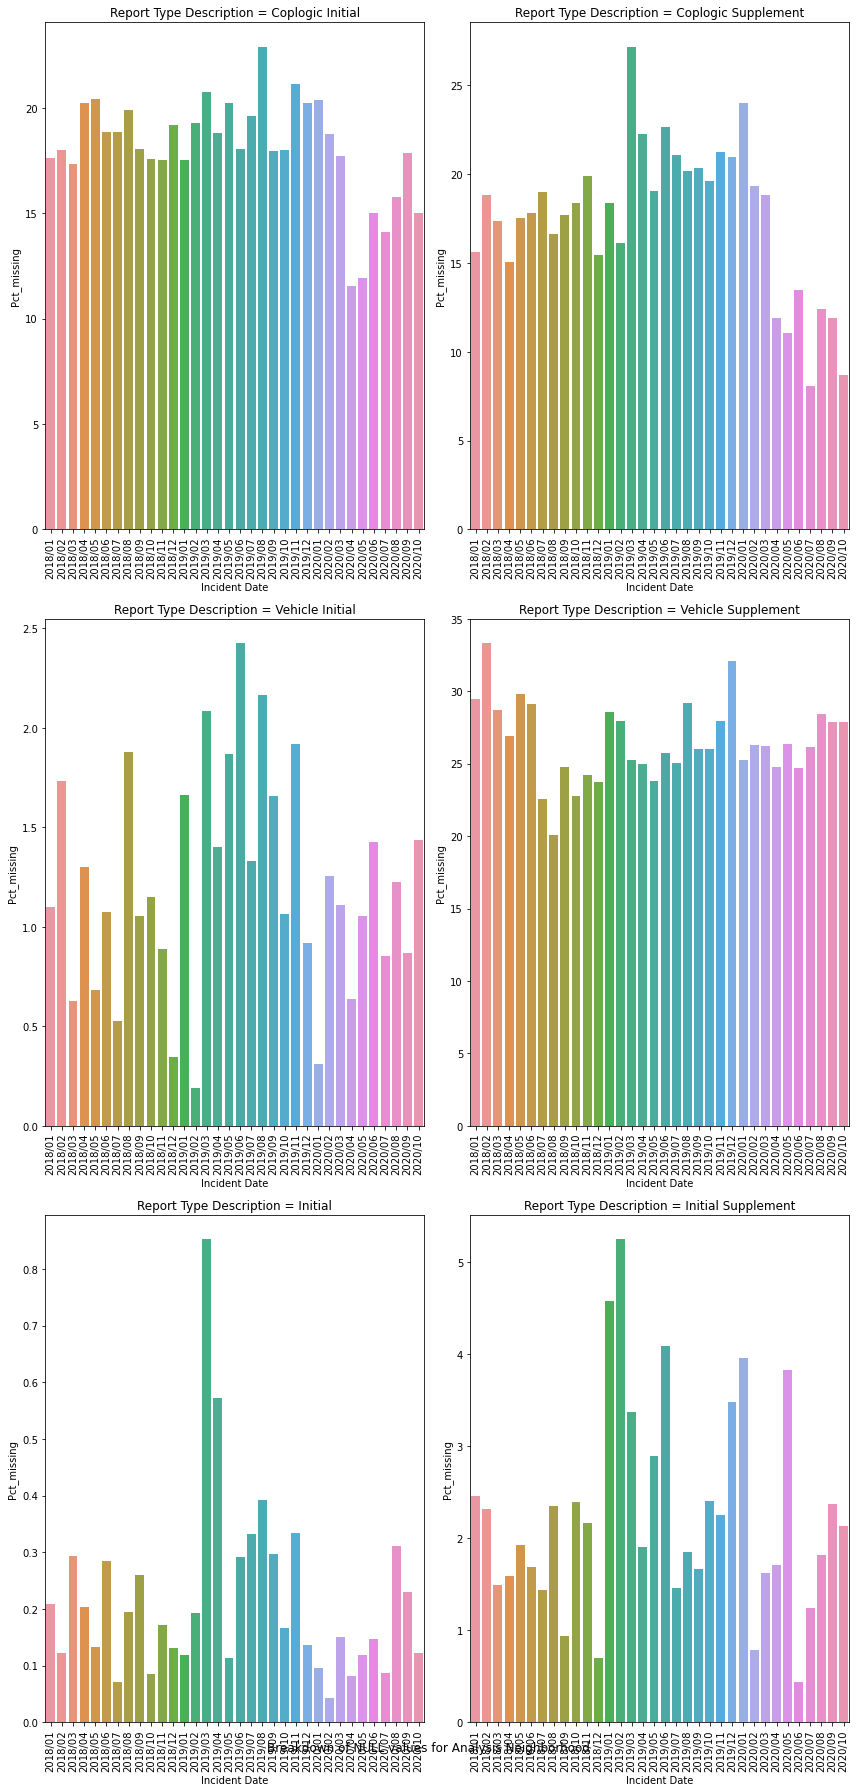

In [23]:
# Plot the percentages missing for each report type across time
report_types = ["Coplogic Initial", "Coplogic Supplement", "Vehicle Initial", "Vehicle Supplement", "Initial", "Initial Supplement"]

fig, ax = plt.subplots(3, 2, figsize=(12,25))

for j in range(len(ax)):
    for i in range(len(ax[j])):
        report_type = report_types[2*j + i]
        ax[j][i].set_xlabel('label', fontsize=10, position=(.5,20))
        ax[j][i].tick_params(axis='x', rotation=90)
        ax[j][i].set_ylabel('label', fontsize=10)
        ax[j][i] = sns.barplot(x="Incident Date", y="Pct_missing", data=df_nullnbrhds[df_nullnbrhds["Report Type Description"] == report_type], ax=ax[j][i], ci=None)
        ax[j][i].set_title("Report Type Description = " + report_type)
fig.suptitle("Breakdown of NULL values for Analysis Neighborhood", y=.03)
fig.tight_layout()

plt.show()

In [24]:
df_nullnbrhds_overall = df_nullnbrhds.groupby('Report Type Description').agg({'null_nbrhd_count':'sum','total':'sum'}).reset_index()
df_nullnbrhds_overall['Pct_missing'] = df_nullnbrhds_overall['null_nbrhd_count'] * 100 / df_nullnbrhds_overall['total']
df_nullnbrhds_overall

,Report Type Description,null_nbrhd_count,total,Pct_missing
0,Coplogic Initial,13467,72549,18.562627
1,Coplogic Supplement,1689,9211,18.336771
2,Initial,543,246030,0.220705
3,Initial Supplement,739,32376,2.282555
4,Vehicle Initial,250,20745,1.205110
5,Vehicle Supplement,3773,14238,26.499508


For the report types from Coplogic, which are user entered, we are definitely missing approx 20% neighborhood data.
For Vehicle Supplement reports, neighborhood data that is missing is even higher, nearly 30%.
However, the Initial and Initial Supplement data appears to be in good shape, less than 1% for the former and less than 5% for the latter. 

We see that we are missing a disproportionate number of Neighborhoods from Coplogic reports, as well as Vehicle Supplement reports. Let's look deeper into each of these.

##### 1.5.3.2.1 Missing Neighborhood - Vehicle Supplement <a id='1.5.3.2.1_Missing_Neighborhood_-_Vehicle_Supplement'></a>

In [25]:
incident_data[incident_data['Analysis Neighborhood'].isna() & (incident_data['Report Type Description'] == 'Vehicle Supplement')].groupby('Incident Year')['Incident ID'].count()

Incident Year
2018    1209
2019    1266
2020    1298
Name: Incident ID, dtype: int64

In [26]:
incident_data[incident_data['Analysis Neighborhood'].isna() & (incident_data['Report Type Description'] == 'Vehicle Supplement')].head().T

,3,4,7,27,99
Incident Datetime,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/01 12:10:00 AM,2018/01/01 01:50:00 AM,2018/01/01 01:28:00 PM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,12:42,16:49,00:10,01:50,13:28
Incident Year,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday
Report Datetime,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/01 12:40:00 AM,2018/01/01 03:00:00 AM,2018/01/01 01:29:00 PM
Row ID,61897707041,61901507045,61868707041,61871871010,61898607041
Incident ID,618977,619015,618687,618718,618986
Incident Number,171035750,171055203,171051427,180000360,171027020
Report Type Code,VS,VS,VS,VS,VS


In [27]:
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'] == 'Vehicle Supplement')]['Incident Category'].value_counts()

Recovered Vehicle      3415
Other Offenses          316
Motor Vehicle Theft      30
Robbery                   5
Larceny Theft             3
Vehicle Misplaced         3
Vehicle Impounded         1
Name: Incident Category, dtype: int64

Looks like around 90% of these were of `Incident Category` = `Recovered Vehicle`! Let's look at the Police District of these, since we know that `Out of SF` would mean the vehicles were recovered outside of SF and therefore have no Neighborhood data.

In [28]:
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'] == 'Vehicle Supplement') 
              & (incident_data['Incident Category'] == 'Recovered Vehicle') ].groupby(['Police District'])['Incident ID'].count().sort_values(ascending=False)

Police District
Out of SF     3386
Ingleside        7
Tenderloin       4
Richmond         4
Bayview          4
Southern         3
Northern         2
Mission          2
Taraval          1
Park             1
Central          1
Name: Incident ID, dtype: int64

Okay, most of those are outside of SF. Let's quickly look at the other records where `Incident Category` != `Recovered Vehicle`.

In [29]:
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'] == 'Vehicle Supplement') 
              & ~(incident_data['Incident Category'] == 'Recovered Vehicle') ].groupby(['Incident Description'])['Incident ID'].count().sort_values(ascending=False)

Incident Description
License Plate, Recovered                         311
Vehicle, Recovered, Stolen outside SF             11
Vehicle, Stolen, Auto                              8
Carjacking with a Gun                              5
Vehicle, Misplaced                                 3
Vehicle, Stolen, Motorcycle                        3
License Plate, Found                               3
Vehicle, Stolen & Recovered                        2
Vehicle, Stolen, Other Vehicle                     2
License Plate, Stolen                              2
License Plate, Lost                                2
Vehicle, Stolen, Bus                               1
Vehicle, Stolen, Mobile Home or House Trailer      1
Vehicle, Stolen, Attempted                         1
Vehicle, Impounded                                 1
Theft, From Locked Vehicle, >$950                  1
Vehicle, Stolen, Truck                             1
Name: Incident ID, dtype: int64

Of the remaining 10%, the vast majority involve `License Plate, Recovered`, and the remainder seem to be updates to the `Initial Vehicle` reports. Note that we also have some more `Vehicle, Recovered, Stolen outside SF`. 

**QUESTION: Based on this, can/should we impute the `Analysis Neighborhood` field from the `Inital Vehicle` report?**

**ANSWER: No. Although we can impute this data, we should not. Vehicles recovered outside of SF should not unduly influence the count of incidents within a Neighborhood. It is possible that we want to make a note that a vehicle was recovered for an initial report, but we would have to do this for every vehicle recovery report. Furthermore, Incident Numbers can span across multiple loosely-associated Incident IDs (i.e. a car-theft ring across multiple Neighborhoods)**

##### 1.5.3.2.2 Missing Neighborhood - Coplogic<a id='1.5.3.2.2_Missing_Neighborhood_-_Coplogic'></a>

In [30]:
incident_data[incident_data['Analysis Neighborhood'].isna() & (incident_data['Report Type Description'].str.startswith('Coplogic'))].groupby('Incident Year')['Incident ID'].count()

Incident Year
2018    6267
2019    6330
2020    2559
Name: Incident ID, dtype: int64

In [31]:
incident_data[incident_data['Analysis Neighborhood'].isna() & (incident_data['Report Type Description'].str.startswith('Coplogic'))].head().T

,5,6,237,238,239
Incident Datetime,2018/01/01 04:07:00 AM,2018/01/01 04:00:00 PM,2018/01/01 06:50:00 PM,2018/01/01 08:00:00 PM,2018/01/01 12:00:00 PM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,04:07,16:00,18:50,20:00,12:00
Incident Year,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday
Report Datetime,2018/01/02 09:25:00 AM,2018/01/09 10:27:00 AM,2018/01/01 11:47:00 PM,2018/01/01 10:47:00 PM,2018/01/01 02:11:00 PM
Row ID,62075106372,62267806372,61916506224,61918206244,61918471000
Incident ID,620751,622678,619165,619182,619184
Incident Number,186002716,186008316,186000635,186000613,186000209
Report Type Code,II,II,II,II,II


In [32]:
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'].str.startswith('Coplogic'))]['Incident Category'].value_counts()

Larceny Theft                 11239
Lost Property                  2576
Malicious Mischief             1051
Burglary                        195
Fraud                            79
Forgery And Counterfeiting       16
Name: Incident Category, dtype: int64

Wow. Large numbers of `Larceny Theft`. Let's dive deeper into these.

In [33]:
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'].str.startswith('Coplogic'))
              & (incident_data['Incident Category'] == 'Larceny Theft')]['Incident Description'].value_counts()

Theft, From Locked Vehicle, >$950      6294
Theft, Other Property, $50-$200        2104
Theft, Other Property, >$950           1778
Theft, From Unlocked Vehicle, >$950     962
Theft, From Locked Vehicle, Att.         35
Theft, Bicycle, $200-$950                32
Theft, Bicycle, >$950                    32
Theft, Bicycle, $50-$200                  2
Name: Incident Description, dtype: int64

In [34]:
# let's get some from 2020 and see if there are corresponding other reports
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'].str.startswith('Coplogic'))
              & (incident_data['Incident Category'] == 'Larceny Theft')
              & (incident_data['Incident Year'] == 2020)].head().T

,3,279,281,329,342
Incident Datetime,2020/01/01 11:00:00 AM,2020/01/01 06:45:00 PM,2020/01/01 12:45:00 PM,2020/01/01 04:30:00 PM,2020/01/01 12:35:00 AM
Incident Date,2020/01/01,2020/01/01,2020/01/01,2020/01/01,2020/01/01
Incident Time,11:00,18:45,12:45,16:30,00:35
Incident Year,2020,2020,2020,2020,2020
Incident Day of Week,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
Report Datetime,2020/01/01 06:17:00 PM,2020/01/01 08:50:00 PM,2020/01/01 08:27:00 PM,2020/01/02 11:30:00 PM,2020/01/02 01:11:00 PM
Row ID,88718406244,88720906244,88721606244,88756706374,88789206372
Incident ID,887184,887209,887216,887567,887892
Incident Number,206000262,206000290,206000206,200001939,206001000
Report Type Code,II,II,IS,IS,II


In [35]:
incident_data[incident_data['Incident Number'].isin([206000206,200001939])].T

,175,278,281,329,363
Incident Datetime,2020/01/01 04:30:00 PM,2020/01/01 12:45:00 PM,2020/01/01 12:45:00 PM,2020/01/01 04:30:00 PM,2020/01/01 04:30:00 PM
Incident Date,2020/01/01,2020/01/01,2020/01/01,2020/01/01,2020/01/01
Incident Time,16:30,12:45,12:45,16:30,16:30
Incident Year,2020,2020,2020,2020,2020
Incident Day of Week,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
Report Datetime,2020/01/01 04:48:00 PM,2020/01/01 01:42:00 PM,2020/01/01 08:27:00 PM,2020/01/02 11:30:00 PM,2020/01/05 07:38:00 PM
Row ID,88702406244,88720806244,88721606244,88756706374,88858506374
Incident ID,887024,887208,887216,887567,888585
Incident Number,200001939,206000206,206000206,200001939,200001939
Report Type Code,II,II,IS,IS,IS


Looks like there may indeed be other reports related to these incidents containing Neighborhood data already in the system.

**QUESTION: Do we impute the Neighborhood data?**

**ANSWER: For now, let's leave it as is. There may already be other reports representing these incidents. One thing to note though, is that Coplogic reports may indicate that certain neighborhoods have increased citizen involvement, and this may be useful data in our analysis.**

In [36]:
# let's take a look at one additional breakdown, by Police District, of these Larceny Theft reports missing Neighborhood data
incident_data[incident_data['Analysis Neighborhood'].isna() 
              & (incident_data['Report Type Description'].str.startswith('Coplogic'))
              & (incident_data['Incident Category'] == 'Larceny Theft')]['Police District'].value_counts()

Central       2001
Southern      1878
Richmond      1687
Mission       1169
Northern      1155
Out of SF      926
Park           781
Taraval        551
Bayview        481
Tenderloin     347
Ingleside      263
Name: Police District, dtype: int64

The Central district encompasses popular tourist areas like Fisherman's Wharf and Chinatown, as well as the Financial District. The Southern district encompasses Market Street and South of Market area. The Richmond district includes Golden Gate Park. See https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf

### 1.5.4 Categorical Features<a id='1.5.4_Categorical_Features'></a>

In [37]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        395149 non-null  object 
 1   Incident Date            395149 non-null  object 
 2   Incident Time            395149 non-null  object 
 3   Incident Year            395149 non-null  int64  
 4   Incident Day of Week     395149 non-null  object 
 5   Report Datetime          395149 non-null  object 
 6   Row ID                   395149 non-null  int64  
 7   Incident ID              395149 non-null  int64  
 8   Incident Number          395149 non-null  int64  
 9   Report Type Code         395149 non-null  object 
 10  Report Type Description  395149 non-null  object 
 11  Filed Online             395149 non-null  bool   
 12  Incident Code            395149 non-null  int64  
 13  Incident Category        394879 non-null  object 
 14  Incid

#### 1.5.4.1 Police District<a id='1.5.4.1_Police_District'></a>

Let's look at how many `Police District`s we have.

In [38]:
incident_data['Police District'].value_counts().to_frame().sort_index().reset_index()["index"]

0        Bayview
1        Central
2      Ingleside
3        Mission
4       Northern
5      Out of SF
6           Park
7       Richmond
8       Southern
9        Taraval
10    Tenderloin
Name: index, dtype: object

##### 1.5.4.1.1 Police District - Out of SF<a id='1.5.4.1.1_Police_District_-_Out_of_SF'></a>

Addresses for incidents outside of SF - some cases are referred from outside SFPD districts. These will be marked as “Out of SF” in the Police District column and do not have associated geographic information. Let's check to see if they have associated Neighborhood data.

In [39]:
incident_data[incident_data['Police District'] == 'Out of SF'].groupby('Analysis Neighborhood')[['Incident ID','Row ID']].count()

,Incident ID,Row ID
Analysis Neighborhood,,
Bayview Hunters Point,203,203
Bernal Heights,16,16
Castro/Upper Market,14,14
Chinatown,599,599
Excelsior,10,10
Financial District/South Beach,62,62
Glen Park,6,6
Golden Gate Park,39,39
Haight Ashbury,8,8


In [40]:
incident_data[(incident_data['Police District'] == 'Out of SF') & (~incident_data['Analysis Neighborhood'].isna())].head().T

,225,437,440,441,442
Incident Datetime,2018/01/01 08:06:00 PM,2018/01/01 12:01:00 AM,2018/01/01 12:00:00 AM,2018/01/01 12:00:00 AM,2018/01/01 05:00:00 PM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,20:06,00:01,00:00,00:00,17:00
Incident Year,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday
Report Datetime,2018/01/01 11:29:00 PM,2018/05/28 09:53:00 PM,2018/06/28 03:00:00 PM,2018/06/28 03:00:00 PM,2018/06/29 10:55:00 AM
Row ID,61913771000,67862914015,68443009024,68443068030,68473071000
Incident ID,619137,678629,684430,684430,684730
Incident Number,180002833,189001559,180480223,180480223,180482310
Report Type Code,II,II,II,II,II


Let's keep these records for now.

#### 1.5.4.2 Analysis Neighborhood<a id='1.5.4.2_Analysis_Neighborhood'></a>

Let's look at how many `Analysis Neighborhood`s we have.

In [41]:
incident_data['Analysis Neighborhood'].value_counts().to_frame().sort_index()

,Analysis Neighborhood
Bayview Hunters Point,22654
Bernal Heights,6711
Castro/Upper Market,11584
Chinatown,7323
Excelsior,6276
Financial District/South Beach,33143
Glen Park,1976
Golden Gate Park,3978
Haight Ashbury,6412
Hayes Valley,10486


We will have to be aware of how these map to the 311 data and the housing sales data. 

**We will be outputting these to a file later in the notebook.**

#### 1.5.4.3 Supervisor District<a id='1.5.4.3_Supervisor_District'></a>

In [42]:
incident_data['Supervisor District'].value_counts().to_frame().sort_index()

,Supervisor District
1.0,17540
2.0,26973
3.0,57110
4.0,10502
5.0,38666
6.0,89015
7.0,15423
8.0,28588
9.0,38264
10.0,39091


While the Supervisor Districts do show a varying number of records, the districts themselves don't really give us much actionable data; that is, districts and neighborhoods have different boundary lines, and neighborhoods provide a much granular look at the data than Supervisor Districts.

**We will not be using Supervisor Districts going forward.**

#### 1.5.4.4 Incident Category<a id='1.5.4.4_Incident_Category'></a>

In [43]:
incident_data['Incident Category'].value_counts().to_frame().reset_index().rename(columns={"index":"name","Incident Category":"count"})

,name,count
0,Larceny Theft,121667
1,Other Miscellaneous,29241
2,Malicious Mischief,24795
3,Non-Criminal,24231
4,Assault,23435
5,Burglary,20097
6,Motor Vehicle Theft,16291
7,Warrant,13580
8,Lost Property,13188
9,Recovered Vehicle,12890


#### 1.5.4.5 Incident Subcategory<a id='1.5.4.5_Incident_Subcategory'></a>

In [44]:
incident_data['Incident Subcategory'].value_counts().to_frame().reset_index().rename(columns={"index":"name","Incident Subcategory":"count"})

,name,count
0,Larceny - From Vehicle,68828
1,Other,53233
2,Larceny Theft - Other,30128
3,Vandalism,24357
4,Motor Vehicle Theft,16186
...,...,...
70,Robbery - Residential,16
71,Bribery,5
72,Arrest,3
73,"Human Trafficking (A), Commercial Sex Acts",1


## 1.6 Aggregate data<a id='1.6_Aggregate_data'></a>

It's time to aggregate our data by month and by neighborhood.

In [45]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        395149 non-null  object 
 1   Incident Date            395149 non-null  object 
 2   Incident Time            395149 non-null  object 
 3   Incident Year            395149 non-null  int64  
 4   Incident Day of Week     395149 non-null  object 
 5   Report Datetime          395149 non-null  object 
 6   Row ID                   395149 non-null  int64  
 7   Incident ID              395149 non-null  int64  
 8   Incident Number          395149 non-null  int64  
 9   Report Type Code         395149 non-null  object 
 10  Report Type Description  395149 non-null  object 
 11  Filed Online             395149 non-null  bool   
 12  Incident Code            395149 non-null  int64  
 13  Incident Category        394879 non-null  object 
 14  Incid

### 1.6.1 Create Incident Year Month<a id='1.6.1_Create_Incident_Year_Month'></a>

Note that `Incident Datetime` is currently of type `object`. We will first convert it into type `datetime`.

In [46]:
incident_data['Incident Datetime'] = pd.to_datetime(incident_data['Incident Datetime'])

In [47]:
print(incident_data['Incident Datetime'].dtypes)

datetime64[ns]


In [48]:
# Now we can create the new column
incident_data['Incident Year Month'] = incident_data['Incident Datetime'].dt.strftime('%Y%m')

**TODO: in future, we may want to keep the Incident Time as well, or at least keep it in buckets**

In [49]:
incident_data[incident_data['Incident Year Month'] > '202009'].shape

(4935, 21)

In [50]:
incident_data[incident_data['Incident Year Month'] < '202010'].shape

(390214, 21)

### 1.6.2 Aggregate<a id='1.6.2_Aggregate'></a>

Now we can aggregate the data. We will aggregate by year-month and keep the following columns:
  * Incident Year Month
  * Analysis Neighborhood
  * Report Type Description
  * Incident Category
  * Incident Description
  * Police District

Remember, we are only going to keep the records up to and including September 2020 (omitting everything from October 2020 onwards) so that our date range will match with other data.

In [51]:
cols_to_groupby = ['Incident Year Month','Analysis Neighborhood','Report Type Description','Incident Category','Incident Description','Police District']
aggregated_incident_data = incident_data[incident_data['Incident Year Month'] < '202010'].groupby(cols_to_groupby).agg({'Row ID': 'count'})
aggregated_incident_data.columns = ['Incident Count']
aggregated_incident_data = aggregated_incident_data.reset_index()

In [52]:
aggregated_incident_data.head()

,Incident Year Month,Analysis Neighborhood,Report Type Description,Incident Category,Incident Description,Police District,Incident Count
0,201801,Bayview Hunters Point,Coplogic Initial,Larceny Theft,"Theft, From Locked Vehicle, >$950",Bayview,24
1,201801,Bayview Hunters Point,Coplogic Initial,Larceny Theft,"Theft, From Unlocked Vehicle, >$950",Bayview,3
2,201801,Bayview Hunters Point,Coplogic Initial,Larceny Theft,"Theft, Other Property, $50-$200",Bayview,4
3,201801,Bayview Hunters Point,Coplogic Initial,Larceny Theft,"Theft, Other Property, $50-$200",Mission,1
4,201801,Bayview Hunters Point,Coplogic Initial,Larceny Theft,"Theft, Other Property, >$950",Bayview,3


In [53]:
aggregated_incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157056 entries, 0 to 157055
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Incident Year Month      157056 non-null  object
 1   Analysis Neighborhood    157056 non-null  object
 2   Report Type Description  157056 non-null  object
 3   Incident Category        157056 non-null  object
 4   Incident Description     157056 non-null  object
 5   Police District          157056 non-null  object
 6   Incident Count           157056 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.4+ MB


## 1.7 Save data<a id='1.7_Save_data'></a>

We will be saving our aggregated data and the list of `Analysis Neighborhood`s to a separate location, to guard against overwriting our original data.

In [54]:
aggregated_incident_data.shape

(157056, 7)

In [55]:
neighborhood_data = pd.DataFrame(aggregated_incident_data['Analysis Neighborhood'].unique())

In [56]:
neighborhood_data.columns = ['Analysis Neighborhood']
neighborhood_data

,Analysis Neighborhood
0,Bayview Hunters Point
1,Bernal Heights
2,Castro/Upper Market
3,Chinatown
4,Excelsior
5,Financial District/South Beach
6,Glen Park
7,Golden Gate Park
8,Haight Ashbury
9,Hayes Valley


In [57]:
datapath = 'data'

# create datapath if it doesn't exist
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [58]:
# write aggregated data
datapath_aggdata = os.path.join(datapath, 'SF_Police_Incidents_aggregated.csv')
if not os.path.exists(datapath_aggdata):
    aggregated_incident_data.to_csv(datapath_aggdata, index=False)

In [59]:
# write neighborhoods list
datapath_neighborhoods = os.path.join(datapath, 'SF_Police_Incident_Neighborhoods.csv')
if not os.path.exists(datapath_neighborhoods):
    neighborhood_data.to_csv(datapath_neighborhoods, index=False)